# Hodgkin-Huxley Model

- A.L. Hodgkin, A.F. Huxley, "A quantitative description of membrane current and its application to conduction and excitation in nerve", J. Physiol., 117, 500-544, 1952.

In [1]:
%matplotlib inline
import numpy as np
from ecell4 import *

In [2]:
Q10 = 3.0
GNa = 120.0 # mS/cm^2
GK = 36.0 # mS/cm^2
gL = 0.3 # mS/cm^2
EL = -64.387 # mV
ENa = 40.0 # mV
EK = -87.0 # mV
Cm = 1.0 # uF/cm^2

T = 6.3 # degrees C
Iext = 10.0 # nA

with reaction_rules():
    Q = Q10 ** ((T - 6.3) / 10)

    alpha_m = -0.1 * (Vm + 50) / (exp(-(Vm + 50) / 10) - 1)
    beta_m = 4 * exp(-(Vm + 75) / 18)
    ~m > m | Q * (alpha_m * (1 - m) - beta_m * m)

    alpha_h = 0.07 * exp(-(Vm + 75) / 20)
    beta_h = 1.0 / (exp(-(Vm + 45) / 10) + 1)
    ~h > h | Q * (alpha_h * (1 - h) - beta_h * h)

    alpha_n = -0.01 * (Vm + 65) / (exp(-(Vm + 65) / 10) - 1)
    beta_n = 0.125 * exp(-(Vm + 75) / 80)    
    ~n > n | Q * (alpha_n * (1 - n) - beta_n * n)

    gNa = (m ** 3) * h * GNa
    INa = gNa * (Vm - ENa)
    gK = (n ** 4) * GK
    IK = gK * (Vm - EK)
    IL = gL * (Vm - EL)
    ~Vm > Vm | (Iext - (IL + INa + IK)) / Cm

hhm = get_model()

In [3]:
for rr in hhm.reaction_rules():
    print(rr.as_string())

Vm>m+Vm|(1.0*((((-0.1*(Vm+50))/(exp((-(Vm+50)/10))-1))*(1-m))-(4*exp((-(Vm+75)/18))*m)))
Vm>h+Vm|(1.0*((0.07*exp((-(Vm+75)/20))*(1-h))-((1.0/(exp((-(Vm+45)/10))+1))*h)))
Vm>n+Vm|(1.0*((((-0.01*(Vm+65))/(exp((-(Vm+65)/10))-1))*(1-n))-(0.125*exp((-(Vm+75)/80))*n)))
m+h+n>Vm+m+h+n|((10.0-((0.3*(Vm--64.387))+((m**3)*h*120.0*(Vm-40.0))+((n**4)*36.0*(Vm--87.0))))/1.0)


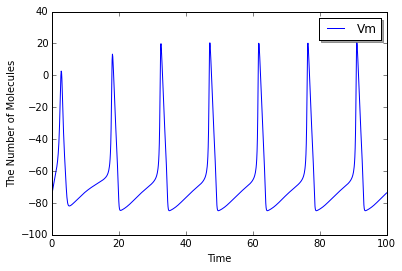

In [4]:
run_simulation(np.linspace(0, 100, 1001), model=hhm, y0={'Vm': -75}, species_list=['Vm'])